# Predicting Flight Delays: Regression Models

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [21]:
flights = pd.read_csv('../data/data-feature/flights-feature-edit.csv')

In [22]:
flights.rename(columns={'fl_date': 'date'}, inplace=True)

In [23]:
weather = pd.read_csv('../data/data-feature/flights_weather_feature_engineering.csv')

In [24]:
weather.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
weather.head()

,date,origin,dest,dep_delay,arr_delay,dep_avg_temp,dep_precip_mm,dep_humidity,dep_visibility,dep_total_snowcm,...,arr_snow,arr_rainy,arr_snow_bin,dep_snow_bin,arr_precip_bin,dep_precip_bin,dep_humidity_bin,arr_humidity_bin,dep_avgtemp_bin,arr_avgtemp_bin
0,2018-06-21,DFW,LGA,2.0,-8.0,26,0.0,52,10,0.0,...,0,0,0,0,0,0,2,2,3,3
1,2018-06-21,DFW,LGA,159.0,162.0,26,0.0,52,10,0.0,...,0,0,0,0,0,0,2,2,3,3
2,2018-06-21,DFW,LGA,43.0,40.0,26,0.0,52,10,0.0,...,0,0,0,0,0,0,2,2,3,3
3,2018-06-21,DCA,LGA,-5.0,-25.0,26,0.0,52,10,0.0,...,0,0,0,0,0,0,2,2,3,3
4,2018-06-21,DCA,LGA,18.0,23.0,26,0.0,52,10,0.0,...,0,0,0,0,0,0,2,2,3,3


## Test 1: Only Flights Data! 

<b> Extract the following features: </b> carrier ID, tail num, origin, destination, arr delay, crs elapsed time

In [26]:
flights.columns

Index(['Unnamed: 0', 'date', 'mkt_unique_carrier', 'op_unique_carrier',
       'tail_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'dep_delay', 'arr_delay',
       'crs_elapsed_time', 'distance', 'month', 'day', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'is_weekend', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score', 'orr_busy',
       'arr_busy', 'route', 'route_mean_delay', 'route_median_delay',
       'route_lq_delay', 'route_uq_delay', 'total_routes',
       'num_delayed_routes', 'route_prob_delay', 'route_mean_dep_delay',
       'route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay'],
      dtype='object')

In [27]:
flights_df1 = flights.drop(['Unnamed: 0', 'date', 'mkt_unique_carrier', 'origin_airport_id', 'origin_city_name',
                           'dest_airport_id', 'dest_city_name', 'dep_delay', 'route', 'total_routes', 'num_delayed_routes'], axis=1)

In [28]:
flights_df1.shape

(980258, 30)

In [29]:
flights_df1.columns

Index(['op_unique_carrier', 'tail_num', 'origin', 'dest', 'arr_delay',
       'crs_elapsed_time', 'distance', 'month', 'day', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'is_weekend', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score', 'orr_busy',
       'arr_busy', 'route_mean_delay', 'route_median_delay', 'route_lq_delay',
       'route_uq_delay', 'route_prob_delay', 'route_mean_dep_delay',
       'route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay'],
      dtype='object')

In [30]:
flights_df1 = flights_df1.sample(frac=1)[:100000]

In [31]:
X = flights_df1.drop('arr_delay', axis=1)
y = flights_df1['arr_delay']

In [32]:
tail_num_le = LabelEncoder()
X['tail_num'] = tail_num_le.fit_transform(X['tail_num'])

airports_le = LabelEncoder()
X['origin'] = airports_le.fit_transform(X['origin'])
X['dest'] = airports_le.fit_transform(X['dest'])

op_carrier_le = LabelEncoder()
X['op_unique_carrier'] = op_carrier_le.fit_transform(X['op_unique_carrier'])

In [33]:
dummies = pd.get_dummies(X[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X = pd.concat([X, dummies], axis=1)

In [34]:
X.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [35]:
len(X.columns)

45

In [36]:
X

,op_unique_carrier,tail_num,origin,dest,crs_elapsed_time,distance,month,day,month_arr_delay_avg,month_dep_delay_avg,...,arr_time_desc_morning,arr_time_desc_noon,orr_busy_high,orr_busy_low,orr_busy_medium,orr_busy_medium-high,arr_busy_high,arr_busy_low,arr_busy_medium,arr_busy_medium-high
949942,22,2880,156,119,572.0,4962,7,20,-5.0,-2.0,...,1,0,0,0,1,0,0,0,0,1
301370,9,4239,156,231,30.0,54,1,26,-7.0,-3.0,...,0,0,0,0,1,0,0,1,0,0
434492,5,5764,183,94,291.0,1626,8,16,-5.0,-2.0,...,0,0,0,0,0,1,1,0,0,0
831492,4,400,93,233,136.0,752,10,16,-7.0,-3.0,...,0,0,1,0,0,0,0,1,0,0
74045,24,2436,340,94,150.0,770,11,8,-7.0,-3.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,3,3209,321,195,95.0,337,6,9,-4.0,-1.0,...,0,0,0,0,0,1,1,0,0,0
871081,19,2333,300,319,123.0,564,4,28,-7.0,-3.0,...,1,0,0,0,1,0,0,0,0,1
922732,3,2300,319,309,247.0,1774,10,25,-7.0,-3.0,...,0,0,0,0,0,1,0,0,1,0
517441,24,2761,309,270,145.0,843,3,12,-6.0,-2.0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
X_transformed = X.to_numpy()
y_transformed = y.to_numpy().reshape(-1,1)

In [38]:
'''
number_of_rows = X_transformed.shape[0]
random_indices = np.random.choice(number_of_rows, size=100000, replace=False)
X_transformed_sample = X_transformed[random_indices, :]

number_of_rows = y.shape[0]
y_sample = y[random_indices]

X_transformed_sample.shape, y_sample.shape
'''

'\nnumber_of_rows = X_transformed.shape[0]\nrandom_indices = np.random.choice(number_of_rows, size=100000, replace=False)\nX_transformed_sample = X_transformed[random_indices, :]\n\nnumber_of_rows = y.shape[0]\ny_sample = y[random_indices]\n\nX_transformed_sample.shape, y_sample.shape\n'

In [39]:
X_transformed

array([[2.200e+01, 2.880e+03, 1.560e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.000e+00, 4.239e+03, 1.560e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 5.764e+03, 1.830e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.000e+00, 2.300e+03, 3.190e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.400e+01, 2.761e+03, 3.090e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.400e+01, 4.086e+03, 2.540e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size=0.2)

In [41]:
import xgboost as xgb

In [42]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(xtrain, ytrain)
xg_reg.score(xtest, ytest)

0.06733442531814615

In [43]:
rfr = RandomForestRegressor()

In [44]:
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [45]:
rfr.score(xtest, ytest)

0.08131659693030946

In [46]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

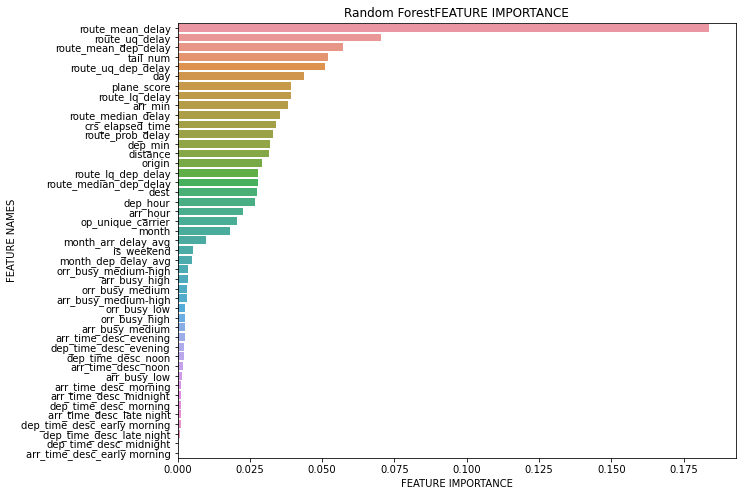

In [47]:
plot_feature_importance(rfr.feature_importances_, X.columns, 'Random Forest')

In [48]:
len(rfr.feature_importances_)

45

In [49]:
X.columns

Index(['op_unique_carrier', 'tail_num', 'origin', 'dest', 'crs_elapsed_time',
       'distance', 'month', 'day', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'is_weekend', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'plane_score', 'route_mean_delay', 'route_median_delay',
       'route_lq_delay', 'route_uq_delay', 'route_prob_delay',
       'route_mean_dep_delay', 'route_median_dep_delay', 'route_lq_dep_delay',
       'route_uq_dep_delay', 'dep_time_desc_early morning',
       'dep_time_desc_evening', 'dep_time_desc_late night',
       'dep_time_desc_midnight', 'dep_time_desc_morning', 'dep_time_desc_noon',
       'arr_time_desc_early morning', 'arr_time_desc_evening',
       'arr_time_desc_late night', 'arr_time_desc_midnight',
       'arr_time_desc_morning', 'arr_time_desc_noon', 'orr_busy_high',
       'orr_busy_low', 'orr_busy_medium', 'orr_busy_medium-high',
       'arr_busy_high', 'arr_busy_low', 'arr_busy_medium',
       'arr_busy_medium-high'],
      dtype='obj

In [50]:
gbr = GradientBoostingRegressor()

In [51]:
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [52]:
gbr.score(xtest, ytest)

0.16297893551574827

In [53]:
y_pred = gbr.predict(xtest)

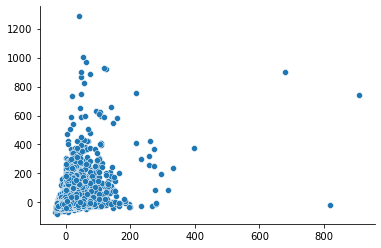

In [54]:
sns.scatterplot(x=y_pred, y=ytest.reshape(1,-1)[0])
sns.despine()
plt.show()

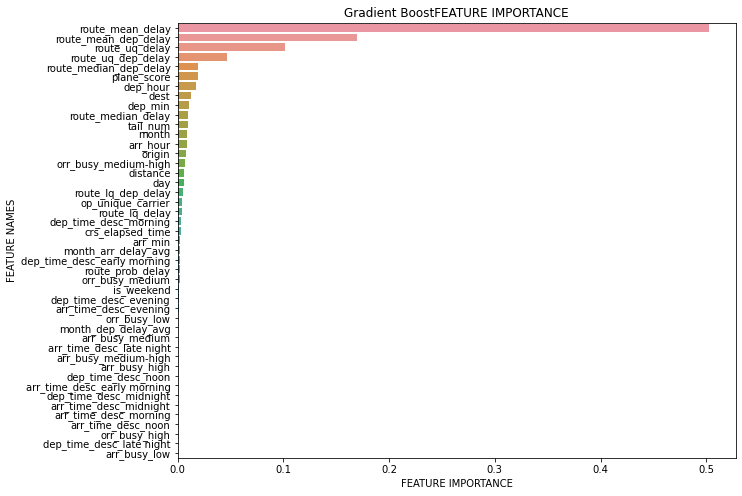

In [55]:
plot_feature_importance(gbr.feature_importances_, X.columns, 'Gradient Boost')

## Test 2: Only Flights Data - Drop a few features!

In [56]:
flights_df2 = flights[['route_mean_delay', 'route_mean_dep_delay', 'plane_score', 'route_median_delay', 'crs_elapsed_time',
                      'route_lq_delay', 'arr_hour', 'route_uq_delay', 'tail_num', 'dep_min', 'dep_hour', 'origin', 'route_prob_delay',
                      'dest', 'arr_min', 'arr_delay']]

In [57]:
flights_df2 = flights_df2.sample(frac=1)[:100000]

In [58]:
X = flights_df2.drop('arr_delay', axis=1)
y = flights_df2['arr_delay']

In [59]:
tail_num_le = LabelEncoder()
X['tail_num'] = tail_num_le.fit_transform(X['tail_num'])

airports_le = LabelEncoder()
X['origin'] = airports_le.fit_transform(X['origin'])
X['dest'] = airports_le.fit_transform(X['dest'])

In [60]:
X_transformed = X.to_numpy()
y_transformed = y.to_numpy().reshape(-1,1)

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size=0.2)

In [62]:
gbr = GradientBoostingRegressor()

In [63]:
gbr.fit(xtrain, ytrain)
gbr.score(xtest, ytest)

0.16026965810020377

## Test 3: Incorporating Weather Data

In [64]:
flights_df3 = pd.merge(flights, weather, on=['date','origin', 'dest'], how='inner')

In [65]:
flights_df3.shape

(102479, 73)

In [66]:
flights_df3 = flights_df3.drop_duplicates()

In [67]:
flights_df3.shape

(102263, 73)

In [68]:
flights_df3 = flights_df3[['op_unique_carrier', 'tail_num', 'origin', 'dest', 'arr_delay_x', 'crs_elapsed_time',
                          'distance', 'month', 'day', 'month_arr_delay_avg', 'month_dep_delay_avg', 'is_weekend',
                          'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'dep_time_desc', 'arr_time_desc',
                          'plane_score', 'orr_busy', 'arr_busy', 'route_mean_delay', 'route_median_delay', 'route_lq_delay', 'route_uq_delay',
                          'route_prob_delay','route_mean_dep_delay', 'route_median_dep_delay', 'route_lq_dep_delay',
                           'route_uq_dep_delay','dep_avg_temp',
                           'dep_precip_mm', 'dep_humidity', 'dep_visibility', 'dep_total_snowcm',
                           'dep_windspeed', 'arr_avg_temp',
                            'arr_precip_mm', 'arr_humidity', 'arr_visibility', 'arr_total_snowcm',
                           'arr_windspeed']]

In [69]:
flights_df3.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)

In [70]:
flights_df3.head()

,op_unique_carrier,tail_num,origin,dest,arr_delay,crs_elapsed_time,distance,month,day,month_arr_delay_avg,...,dep_humidity,dep_visibility,dep_total_snowcm,dep_windspeed,arr_avg_temp,arr_precip_mm,arr_humidity,arr_visibility,arr_total_snowcm,arr_windspeed
0,UA,N76288,SEA,ORD,-19.0,239.0,1721,3,27,-6.0,...,57,10,0.0,13,24,0.0,48,10,0.0,5
1,UA,N845UA,SEA,ORD,-12.0,240.0,1721,3,12,-6.0,...,73,9,0.0,13,24,0.0,63,10,0.0,12
2,UA,N76269,SEA,ORD,-12.0,237.0,1721,3,26,-6.0,...,54,10,0.0,9,26,0.0,49,10,0.0,4
3,UA,N76269,SEA,ORD,-12.0,237.0,1721,3,26,-6.0,...,54,10,0.0,9,26,0.0,49,10,0.0,4
4,UA,N33262,SEA,ORD,-16.0,239.0,1721,3,26,-6.0,...,54,10,0.0,9,26,0.0,49,10,0.0,4


In [71]:
flights_df3 = flights_df3.sample(frac=1)[:100000]

In [72]:
X = flights_df3.drop('arr_delay', axis=1)
y = flights_df3['arr_delay']

In [73]:
tail_num_le = LabelEncoder()
X['tail_num'] = tail_num_le.fit_transform(X['tail_num'])

airports_le = LabelEncoder()
X['origin'] = airports_le.fit_transform(X['origin'])
X['dest'] = airports_le.fit_transform(X['dest'])

op_carrier_le = LabelEncoder()
X['op_unique_carrier'] = op_carrier_le.fit_transform(X['op_unique_carrier'])

In [74]:
dummies = pd.get_dummies(X[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X = pd.concat([X, dummies], axis=1)

In [75]:
X.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [76]:
X_transformed = X.to_numpy()

In [77]:
X_transformed

array([[1.500e+01, 1.760e+02, 7.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.000e+00, 4.211e+03, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.000e+00, 8.550e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.800e+01, 2.498e+03, 7.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 4.069e+03, 7.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 3.473e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [78]:
y_transformed = y.to_numpy().reshape(-1,1)

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size=0.2)

In [80]:
gbr = GradientBoostingRegressor()

In [81]:
gbr.fit(xtrain, ytrain)
gbr.score(xtest, ytest)

0.15639658320666827

In [82]:
y_pred_weather = gbr.predict(xtest)

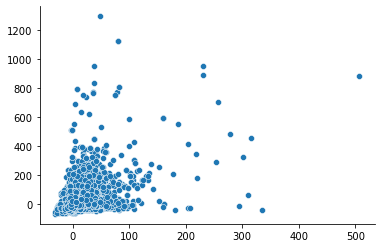

In [83]:
sns.scatterplot(x=y_pred_weather, y=ytest.reshape(1,-1)[0])
sns.despine()
plt.show()

## Test 4: Split the Dataset into Extreme Delay and Non-Extreme Delay; No Weather Data

In [107]:
flights_df4 = flights[['op_unique_carrier', 'tail_num', 'origin', 'dest', 'arr_delay',
       'crs_elapsed_time', 'distance', 'month', 'day', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'is_weekend', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score', 'orr_busy',
       'arr_busy', 'route_mean_delay', 'route_median_delay', 'route_lq_delay',
       'route_uq_delay', 'route_prob_delay', 'route_mean_dep_delay',
       'route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay']]

In [111]:
extreme_delays = flights_df4[flights_df4['arr_delay'] >= 240]
extreme_delays.shape

(5876, 30)

In [140]:
nonext_delays = flights_df4[flights_df4['arr_delay'] < 60]
nonext_delays.shape

(914909, 30)

In [185]:
medium_delays = flights_df4[(flights_df4['arr_delay'] >= 60) & (flights_df4['arr_delay'] <= 240)]
medium_delays.shape

(59528, 30)

In [155]:
nonext_delays = nonext_delays.sample(frac=1)[:100000]
nonext_delays.shape

(100000, 30)

<b> Make model for extreme delays! </b>

In [113]:
extreme_delays.head()

,op_unique_carrier,tail_num,origin,dest,arr_delay,crs_elapsed_time,distance,month,day,month_arr_delay_avg,...,arr_busy,route_mean_delay,route_median_delay,route_lq_delay,route_uq_delay,route_prob_delay,route_mean_dep_delay,route_median_dep_delay,route_lq_dep_delay,route_uq_dep_delay
88,UA,N845UA,MSY,DEN,299.0,177.0,1062,3,25,-6.0,...,high,9.733333,-13.0,-15.5,-4.0,0.066667,16.133333,-4.0,-7.0,-1.5
107,UA,N439UA,EWR,PHX,325.0,326.0,2133,3,9,-6.0,...,medium-high,37.176471,-6.0,-18.0,35.0,0.352941,41.235294,1.0,-4.0,27.0
108,UA,N36247,EWR,PHX,299.0,336.0,2133,3,3,-6.0,...,medium-high,37.176471,-6.0,-18.0,35.0,0.352941,41.235294,1.0,-4.0,27.0
147,UA,N35236,EWR,MCO,295.0,173.0,937,3,2,-6.0,...,medium-high,4.024390,-9.0,-23.0,11.0,0.268293,16.121951,-3.0,-5.0,18.0
186,UA,N17233,SLC,IAH,335.0,186.0,1195,3,29,-6.0,...,medium-high,30.111111,-10.0,-18.0,-7.0,0.222222,35.777778,-4.0,-8.0,-1.0


In [114]:
X_ext = extreme_delays.drop('arr_delay', axis=1)
y_ext = extreme_delays['arr_delay']

In [115]:
tail_num_le = LabelEncoder()
X_ext['tail_num'] = tail_num_le.fit_transform(X_ext['tail_num'])

airports_le = LabelEncoder()
X_ext['origin'] = airports_le.fit_transform(X_ext['origin'])
X_ext['dest'] = airports_le.fit_transform(X_ext['dest'])

op_carrier_le = LabelEncoder()
X_ext['op_unique_carrier'] = op_carrier_le.fit_transform(X_ext['op_unique_carrier'])

In [116]:
dummies = pd.get_dummies(X_ext[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X_ext = pd.concat([X_ext, dummies], axis=1)

In [117]:
X_ext.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [119]:
X_ext_transformed = X_ext.to_numpy()

In [120]:
y_ext_transformed = y_ext.to_numpy().reshape(-1,1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_ext_transformed, y_ext_transformed, train_size=0.75)

In [122]:
gbr = GradientBoostingRegressor()

In [123]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.6465185260634216

In [124]:
y_pred_ext = gbr.predict(X_test)

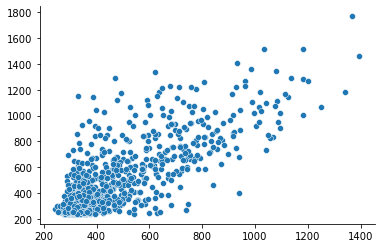

In [126]:
sns.scatterplot(x=y_pred_ext, y=y_test.reshape(1,-1)[0])
sns.despine()
plt.show()

<b> Modelling non-extreme delays! </b>

In [156]:
nonext_delays.head()

,op_unique_carrier,tail_num,origin,dest,arr_delay,crs_elapsed_time,distance,month,day,month_arr_delay_avg,...,arr_busy,route_mean_delay,route_median_delay,route_lq_delay,route_uq_delay,route_prob_delay,route_mean_dep_delay,route_median_dep_delay,route_lq_dep_delay,route_uq_dep_delay
722077,AA,N988NN,MSY,MIA,-17.0,116.0,675,3,3,-6.0,...,medium,-1.076923,-3.0,-12.00,9.0,0.230769,1.076923,-2.0,-5.00,7.00
188552,B6,N307JB,MCO,DCA,18.0,134.0,759,5,5,-6.0,...,medium-high,0.714286,-6.0,-12.00,5.0,0.190476,2.285714,-3.0,-6.00,1.00
847379,WN,N7817J,SAN,STL,-17.0,210.0,1557,3,24,-6.0,...,medium,-14.000000,-15.0,-17.00,-14.0,0.000000,7.400000,7.0,2.00,10.00
949493,YV,N88331,IAH,LFT,10.0,65.0,201,2,22,-6.0,...,low,7.750000,8.5,5.75,10.5,0.500000,-2.500000,-1.5,-3.75,-0.25
656552,WN,N8579Z,RDU,FLL,-23.0,130.0,680,9,18,-8.0,...,medium-high,-9.400000,-16.0,-18.00,-12.0,0.200000,-2.200000,-3.0,-5.00,0.00


In [157]:
X_nonext = nonext_delays.drop('arr_delay', axis=1)
y_nonext = nonext_delays['arr_delay']

In [158]:
tail_num_le = LabelEncoder()
X_nonext['tail_num'] = tail_num_le.fit_transform(X_nonext['tail_num'])

airports_le = LabelEncoder()
X_nonext['origin'] = airports_le.fit_transform(X_nonext['origin'])
X_nonext['dest'] = airports_le.fit_transform(X_nonext['dest'])

op_carrier_le = LabelEncoder()
X_nonext['op_unique_carrier'] = op_carrier_le.fit_transform(X_nonext['op_unique_carrier'])

In [159]:
dummies = pd.get_dummies(X_nonext[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X_nonext = pd.concat([X_nonext, dummies], axis=1)

In [160]:
X_nonext.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [161]:
X_nonext_transformed = X_nonext.to_numpy()

In [162]:
y_nonext_transformed = y_nonext.to_numpy().reshape(-1,1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_nonext_transformed, y_nonext_transformed, train_size=0.75)

In [164]:
gbr = GradientBoostingRegressor()

In [165]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.18811764746725346

In [166]:
y_pred_nonext = gbr.predict(X_test)

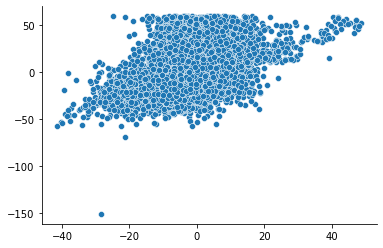

In [167]:
sns.scatterplot(x=y_pred_nonext, y=y_test.reshape(1,-1)[0])
sns.despine()
plt.show()

<b> Make separate model for medium delays! </b>

In [186]:
medium_delays.head()

,op_unique_carrier,tail_num,origin,dest,arr_delay,crs_elapsed_time,distance,month,day,month_arr_delay_avg,...,arr_busy,route_mean_delay,route_median_delay,route_lq_delay,route_uq_delay,route_prob_delay,route_mean_dep_delay,route_median_dep_delay,route_lq_dep_delay,route_uq_dep_delay
6,UA,N431UA,EWR,FLL,118.0,183.0,1065,3,21,-6.0,...,medium-high,0.240000,-11.0,-18.0,4.00,0.200000,12.720000,-1.0,-6.00,15.00
16,UA,N14250,EWR,FLL,77.0,189.0,1065,3,2,-6.0,...,medium-high,0.240000,-11.0,-18.0,4.00,0.200000,12.720000,-1.0,-6.00,15.00
27,UA,N76526,DEN,EUG,84.0,163.0,996,3,22,-6.0,...,low,24.250000,23.0,-25.5,72.75,0.500000,40.000000,38.0,-4.75,82.75
28,UA,N24224,DEN,EUG,69.0,163.0,996,3,14,-6.0,...,low,24.250000,23.0,-25.5,72.75,0.500000,40.000000,38.0,-4.75,82.75
33,UA,N21108,PHX,EWR,81.0,275.0,2133,3,18,-6.0,...,medium-high,2.318182,-13.5,-23.0,23.00,0.363636,13.363636,0.0,-5.00,33.25


In [187]:
X_medium = medium_delays.drop('arr_delay', axis=1)
y_medium = medium_delays['arr_delay']

In [188]:
tail_num_le = LabelEncoder()
X_medium['tail_num'] = tail_num_le.fit_transform(X_medium['tail_num'])

airports_le = LabelEncoder()
X_medium['origin'] = airports_le.fit_transform(X_medium['origin'])
X_medium['dest'] = airports_le.fit_transform(X_medium['dest'])

op_carrier_le = LabelEncoder()
X_medium['op_unique_carrier'] = op_carrier_le.fit_transform(X_medium['op_unique_carrier'])

In [189]:
dummies = pd.get_dummies(X_medium[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X_medium = pd.concat([X_medium, dummies], axis=1)

In [190]:
X_medium.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [191]:
X_medium_transformed = X_medium.to_numpy()

In [192]:
y_medium_transformed = y_medium.to_numpy().reshape(-1,1)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_medium_transformed, y_medium_transformed, train_size=0.75)

In [194]:
gbr = GradientBoostingRegressor()

In [195]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.3233859474184072

In [196]:
y_pred_medium = gbr.predict(X_test)

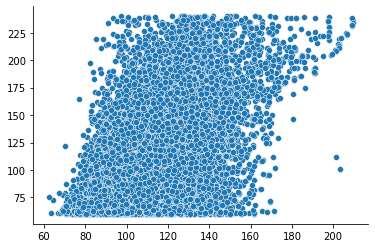

In [197]:
sns.scatterplot(x=y_pred_medium, y=y_test.reshape(1,-1)[0])
sns.despine()
plt.show()

In [183]:
medium_delays['arr_delay'].describe()

count    100000.000000
mean         38.204750
std          71.390828
min           0.000000
25%           5.000000
50%          16.000000
75%          42.000000
max        2635.000000
Name: arr_delay, dtype: float64

## Test 5: Split the Dataset into Extreme Delay and Non-Extreme Delay; Weather Data

In [236]:
flights_df5 = flights_df3.copy()

In [237]:
extreme_weather = flights_df5[]

,op_unique_carrier,tail_num,origin,dest,arr_delay,crs_elapsed_time,distance,month,day,month_arr_delay_avg,...,dep_humidity,dep_visibility,dep_total_snowcm,dep_windspeed,arr_avg_temp,arr_precip_mm,arr_humidity,arr_visibility,arr_total_snowcm,arr_windspeed
31006,UA,N14231,ORD,DCA,43.0,110.0,612,10,8,-7.0,...,22,10,0.0,7,20,61.5,93,6,0.0,15
88772,B6,N983JT,LAX,JFK,8.0,333.0,2475,3,24,-6.0,...,78,9,0.0,16,13,0.2,78,9,0.0,16
16266,DL,N305DN,ATL,LGA,-24.0,134.0,762,4,5,-7.0,...,80,8,0.0,16,17,0.0,80,8,0.0,16
51098,DL,N313DN,DCA,ATL,-3.0,114.0,547,11,11,-7.0,...,78,8,1.9,16,3,2.6,78,8,1.9,16
72077,NK,N901NK,DFW,MSP,-9.0,149.0,852,9,15,-8.0,...,67,10,0.0,10,28,0.7,67,10,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,AA,N956NN,LAX,DFW,-12.0,182.0,1235,4,19,-7.0,...,57,10,0.0,18,13,0.0,57,10,0.0,18
91346,UA,N33266,ORD,SEA,91.0,278.0,1721,2,20,-6.0,...,36,10,0.0,11,-1,0.1,82,10,0.0,4
50519,YX,N725YX,ORD,MSP,-7.0,96.0,334,12,17,-6.0,...,55,10,0.0,18,-2,0.0,79,10,0.0,12
50491,AA,N962NN,ORD,MSP,-17.0,87.0,334,12,6,-6.0,...,36,10,0.0,19,2,0.1,68,10,0.1,20
